In [1]:
import pandas as pd
import numpy as np
import konlpy
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Okt
import re
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import font_manager
f_path = '/Library/Fonts/Arial Unicode.ttf'
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
plt.rcParams["axes.unicode_minus"] = False #마이너스 부호로 한글 꺠짐 방지
rc('font', family='Arial Unicode MS')
%matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

okt = Okt()
# komoran=Komoran()
# kkma=Kkma()
# hannanum=Hannanum()

In [2]:
df = pd.read_excel("/Users/young/git/project/export/비전공자 개발자_2023-01-31.xlsx")
df.rename(columns={'Unnamed: 0':'Rank'},inplace=True)


In [3]:
df.tail(5)

,Rank,title,description,author,timestamp
1045,1045,"문과 개발자, 정말 비전공자도 IT 취업이 가능할까?","문과 개발자, 정말 비전공자도 IT 취업이 가능할까? 문과라서 취업할 길이 보이...",그대 미소에 봄이 돼줄게요,2021.09.18.
1046,1046,"자바 개발자 되는 법, 비전공자에게 적합한 과정은?",자바 개발자 되는 법 비전공자에게 맞는 과정 자바 개발자가 되기 위해 비전공자에...,IT교육및취업전문가 융쌤,2022.06.03.
1047,1047,"소프트웨어개발자되는법, 컴공출신 아닌 비전공자 자바웹포폴...",오늘은 컴공전공생이 아닌 비전공자가 #소프트웨어개발자되는법 #웹개발프로젝트 제작...,월요일에 만든 블로그,2022.01.20.
1048,1048,종로자바학원에서 비전공자도 개발자 취업 가능해요!!,종로자바학원에서 비전공자도 개발자 취업 가능해요!! 비전공자분들의 가장 큰 고민...,따봉아빠의 IT 일상,2017.09.08.
1049,1049,(비전공자 공부순서) 개발자가 하고 싶어요.....,그럼에도 불구하고 디지털노마드를 꿈꾸시거나 개발자의 꿈을 갖고 계신 분 혹은.....,초보개발자 _ 왕곰,2022.09.13.


In [4]:
df['structure'] = ''

In [5]:
def pos_seperator(pos):
    #품사
    pos = re.search(('(?<=\/)[a-zA-Z]*'),tup)[0]
    #형태소
    morphs = re.search(('.+(?=\/)'),tup)[0]

def add_scores():
    return 

def word_parser(df):
    morphs_list = []
    phrase_list = []
    structure_list = []
    morphs_only_list = []
    # count_morphs_list = []
    # count_phrase_list = []
    # df 반복문 돌며 어절, 형태소 분해, 문장구조 분해 
    for idx,rows in df.iterrows():
        split_phrases = okt.phrases(rows[1])
        split_morphs = okt.pos(rows[1], join=True)
        morphs_tmp_list = []

        for i in split_phrases:
            phrase_list.append(i + '/' + 'Noun')
        for i in split_morphs:
            if 'Punctuation' in i:
                continue
            morphs_list.append(i)
            morphs_tmp_list.append(re.split(('/'),i)[0])
    #명사 중복 제거 후 구조화
        # tmp_structure = []
        tmp_structure = ''
        for jdx,tup in enumerate(okt.pos(rows[1])):
            if jdx > 0 and tmp == 'Noun' and tup[1] == 'Noun':
                continue
            tmp = okt.pos(rows[1])[jdx][1]
            # structure_list.append(tup[1])
            # tmp_structure += '_' + tup[1] if jdx != 0 or jdx != len(okt.pos(rows[1])) - 1 else tup[1]
            # if jdx != 0:
            #     tmp_structure += '_' + tup[1]
            # else:
            #     tmp_structure += tup[1]
            tmp_structure += '_' + tup[1]
            # structure_list.append([i for i in tup[1]])
        structure_list.append(tmp_structure)
        morphs_only_list.append(morphs_tmp_list)
    #unique값 찾기
    morphs_set = list(set(morphs_list))
    phrase_set = list(set(phrase_list))
    structure_set = list(set(structure_list))
    #빈도 카운트
    print(len(phrase_set))
    for i in range(len(morphs_set)):
        #두 리스트간 중복 삭제
        if morphs_set[i] in phrase_set:
            phrase_set.remove(morphs_set[i])
        morphs_set[i] = morphs_set[i] + '/' + str(morphs_list.count(morphs_set[i]))

    for i in range(len(phrase_set)):
        phrase_set[i] = phrase_set[i] + '_joint/' + str(phrase_list.count(phrase_set[i]))

    for i in range(len(structure_set)):
        structure_set[i] = structure_set[i] + '/' + str(structure_list.count(structure_set[i]))

    df['morphs'] = morphs_only_list
    return phrase_set,morphs_set,structure_set,structure_list

phrase_set,morphs_set,structure_set,structure_list = word_parser(df)



3251


In [6]:
df_orgin_structure = []
for i in structure_list:
    
    split = re.split(('_'),i)
    del split[0]

    df_orgin_structure.append(split)

df['structure'] = df_orgin_structure



In [7]:
#단어 토큰 df화
frame = {
    'word' : [],
    'pos' : [],
    'cnt' : []
}
word_st = phrase_set + morphs_set
for i in word_st:
    try:
        split = re.split(('/'),i)
        # print(split[1],split[2],split[3])
        frame['word'].append(split[0])
        frame['pos'].append(split[1])
        frame['cnt'].append(int(split[2]))
    except:
        # print(i)
        continue

frame
df2 = pd.DataFrame(frame)
df2 = df2.sort_values(by="cnt",ascending=False)
df2

,word,pos,cnt
3144,비,Noun,1063
2755,전공자,Noun,1062
3947,개발자,Noun,1029
2410,비전공자,Noun_joint,659
2921,취업,Noun,599
...,...,...,...
1416,비전공자 개발자 꼭,Noun_joint,1
1417,준비할 것,Noun_joint,1
1418,문과 개발자 국비지원 활용 및 포트폴리오 준비방법,Noun_joint,1
1419,취업공부,Noun_joint,1


In [8]:
# 문장구조 df화
structure_frame = {
    'structure' : [],
    'cnt' : []
}
for i in structure_set:
    split_cnt = re.split(('/'),i)
    cnt = int(split_cnt[-1])
    
    split = re.split(('_'),i)
    del split[0]
    split[-1] = re.split(('/'),split[-1])[0]
    # print(cnt)
    structure_frame['structure'].append(split)
    structure_frame['cnt'].append(cnt)
df3 = pd.DataFrame(structure_frame)
df3 = df3.sort_values(by="cnt",ascending=False)
df3

,structure,cnt
79,[Noun],40
407,"[Noun, Punctuation, Noun]",19
685,"[Noun, Josa, Noun]",18
384,"[Noun, Punctuation]",11
121,"[Noun, Punctuation, Noun, Punctuation]",9
...,...,...
282,"[Foreign, Noun, Modifier, Noun, Punctuation]",1
283,"[Noun, Punctuation, Noun, Josa, Noun, Verb, Pu...",1
284,"[Noun, Punctuation, Modifier, Noun, Punctuatio...",1
285,"[Noun, Suffix, Noun, Josa, Alpha, Noun]",1


In [9]:
df3_pop = df3[df3['cnt'] > 1]

for i in range(1):
    sample_structure = random.choices(list(df3_pop['structure']),weights=[i for i in df3_pop['cnt']])[0]



In [10]:
sample_structure_dict = dict.fromkeys(sample_structure)

In [11]:
#문장구조와 단어 조합
def random_choice(sample_list, weight):
    sample = random.choices(sample_list,weights=weight)
    return sample[0]

for pos in sample_structure:
    if pos == 'Noun':
        coin_flip = random_choice(["Noun","Noun_joint"],[0.2,0.8])
        df2_n = df2[df2['pos'] == coin_flip]
    else:
        df2_n = df2[df2['pos'] == pos]
    df2_n.reset_index(drop=False)
    df2_n.sort_values(by='cnt',ascending=False)

    match_senetence = []
    for i,row in df.iterrows():
        if sample_structure == row[5]:
            match_senetence.append(row[1])

    words = []
    
    for i in range(10):
        if pos == 'Punctuation':
            sample = random_choice(["?","!","??","!!"],[1,1,1,1])

        else:
            sample = random_choice(list(df2_n['word']),[i for i in df2_n['cnt']])

        words.append(sample)
    sample_structure_dict[pos] = words

print(sample_structure)
print(match_senetence)
print(sample_structure_dict)

['Noun', 'Josa', 'Noun', 'Josa', 'Verb', 'Verb', 'Punctuation', 'Noun', 'Punctuation']
['비전공자이지만 개발자로 먹고 삽니다 (생능북스)', '비전공자이지만 개발자로 먹고 삽니다(추후 업데이트)']
{'Noun': ['비', '학원', '퍼블리셔', '현실', '후기', '취업', '수', '전공자', '전공자', '과정'], 'Josa': ['이', '로', '은', '한', '가', '의', '에서', '를', '도', '가'], 'Verb': ['알아볼게요', '하는', '할', '따른', '알아보자', '할까', '되다', '되기', '할', '할'], 'Punctuation': ['!', '?', '!', '?', '!', '!!', '??', '!!', '!', '??']}


In [52]:
#꼬리물기를 위한 key-value 생성
tester = list(df['title'])
# tester = ['자바개발자취업 비전공자 교육 과정 안내!']
def create_df_word_joint(tester,direction):
    word_key = []
    word_joint = []
    for i in tester:
        x = 0
        pos = okt.pos(i)

        if direction == 'front':
            while True:
                words = ''
                for j in range(x,len(pos)):
                    if pos[j][1] == 'Punctuation':
                        continue
                    words += pos[j][0]
                    # if j == x:
                    #     word_key.append(words)
                    #     continue
                    # else:
                    #     word_joint.append(words)
                    if j != x:
                        word_key.append(pos[x][0])
                        word_joint.append(words)
                x += 1
                if x == len(pos):
                    break;
        elif direction == 'back':
            words = ''
            for j in range(x,len(pos)):
                    if pos[j][1] == 'Punctuation':
                        continue
                    words += " "+pos[j][0]
                    # if j == x:
                    #     word_key.append(words)
                    #     continue
                    # else:
                    #     word_joint.append(words)
                    if j != x:
                        word_key.append(pos[x][0])
                        word_joint.append(words)
        
    word_joint_aggregate = dict.fromkeys(word_key)
    df_following_word = pd.DataFrame(word_joint,index=word_key,columns=['word'])

    df_unique_counter = pd.DataFrame(df_following_word['word'].value_counts())
    df_unique_counter.rename(columns={"word":"count"},inplace=True)
    df_unique_counter['word'] = df_unique_counter.index
    df_following_word['key'] = df_following_word.index
    df_following_word.drop_duplicates(inplace=True)
    df_word_joint = pd.merge(df_following_word,df_unique_counter,left_on='word',right_on='word',how='inner')
    df_word_joint = df_word_joint[['key','word','count']]

    return df_word_joint





In [13]:
#꼬리물기를 위한 key-values 등장 확률 계산
def cal_odds_df_word_joint(df_input):
    unique_starter = list(set(list(df_input['key'])))
    df_odds = pd.DataFrame()
    num = 0

    for starter in unique_starter:

        df_pieces = df_input[df_input['key'] == starter]
        df_pieces['odds'] = df_pieces['count']/df_pieces['count'].sum()

        if num != 0:
            df_odds = pd.concat([df_odds,df_pieces])
        else:
            df_odds = df_pieces
        num += 1
    
    return df_odds

df_word_joint = create_df_word_joint(tester,'front')
df_word_joint
df_odds = cal_odds_df_word_joint(df_word_joint)

/Users/young/opt/anaconda3/envs/test1/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
#꼬리물기 문장 생성 진행 기능
def create_sentence(starter):
    pass_word = ["수","은","는","과","도","이","위",'니','비','시','히']
    starter = starter
    tmp_forward = []

    for i in range (10):
        if True not in list(df_word_joint['key'].isin([starter])):
            starter = okt.morphs(starter)[-1]
            if True not in list(df_word_joint['key'].isin([starter])):
                starter = starter.strip()[-1]

        df_draw = df_odds[df_odds['key'] == starter].sort_values(by='odds',ascending=False)

        draw_words = list(df_draw.head(5).iloc[:,1])
        draw_odds = list(df_draw.head(5).iloc[:,3])
        draw = random_choice(draw_words,draw_odds)

        if len(tmp_forward) == 0:
            tmp_forward.append(starter)
        if len(tmp_forward) > 0:
            element = draw.lstrip(tmp_forward[-1])
            if element == '':
                tmp_forward.append(draw)
            else:
                tmp_forward.append(element)
        # print(okt.morphs(tmp_forward[-1]))
        
        test_word = okt.morphs(element)[-1]
        if len(tmp_forward) > 5 and okt.pos(test_word)[0][1] == 'Noun':
            if test_word not in pass_word:
                return tmp_forward
            
        # tmp_forward.append(draw)

        starter = draw.lstrip(starter)

    return tmp_forward

거리 계산 단계. 발사된 포탄이 어떤 군집과 가장 가까운가?

In [34]:
#tf idf 계산
#기존 db로 voca 생성

title = []
for sentence in list(df['morphs']):
    title.append(" ".join(sentence))

vectorizer = TfidfVectorizer(min_df=1,decode_error='ignore')
sp_matrix = vectorizer.fit_transform(title)

countervect = sp_matrix.toarray()
countetvect_df = pd.DataFrame(countervect,columns=sorted(vectorizer.vocabulary_))
countetvect_df.index = df.index

cosine_similarity(countetvect_df,countetvect_df)[1]

countervect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

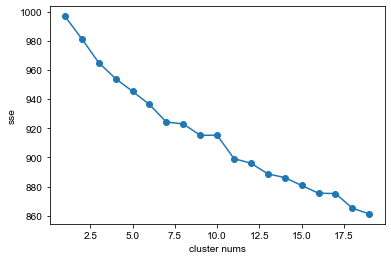

In [16]:
def elbow(x):
    sse = []
    for i in range(1,20):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
        kmeans.fit(x)
        sse.append(kmeans.inertia_)
    plt.plot(range(1,20),sse,marker='o')
    plt.xlabel('cluster nums')
    plt.ylabel('sse')
    plt.show()

elbow(sp_matrix)

In [17]:
cluster_num = 7
kmeans = KMeans(n_clusters=cluster_num, max_iter=10000, random_state=42)
cluster_label = kmeans.fit_predict(sp_matrix)

df['cluster'] = cluster_label

kmeans 군집으로 마무리 문장 이어붙이기 테스트

In [99]:
##테스트
#문장 뽑고 벡터화해서 kmean 군집 속하는데 찾기.
#해당 군집 문장 뽑아서 앞 뒤 살 붙이기

for i in range(1):
    try:
        draw_sen = create_sentence('비')
    except:
        continue
    tmp_sen = " ".join(draw_sen)
    print(tmp_sen)


current_feature = vectorizer.vocabulary_
vect = TfidfVectorizer(vocabulary=current_feature)
new_row = vect.fit_transform([tmp_sen])
new_row = new_row.toarray()
new_row

batch_cluster = kmeans.predict(new_row)[0]
batch_cluster_df = df[df['cluster']==batch_cluster]['morphs']

list(batch_cluster_df)

#배치 역순으로 돌리기
reversed_batch = []
for sentence in list(batch_cluster_df):
    tmp_rev = []
    for ele in reversed(sentence):
        tmp_rev.append(ele)

    reversed_batch.append(" ".join(tmp_rev))

batch_df_word_joint = create_df_word_joint(reversed_batch,'back')
# batch_odds = cal_odds_df_word_joint(batch_df_word_joint)
# batch_odds

비 전공자 개발자 취업 비 전공자개발자


In [126]:
# batch_df_word_joint['key'].unique()
morphs = okt.morphs(tmp_sen)
last_word = re.split(('\s'),morphs[-1])[-1]
if morphs.count(morphs[-1]) < 2 and last_word in batch_df_word_joint['key'].unique():
    print(tmp_sen)
else:
    ender_target_list = []
    # batch_df_word_joint[batch_df_word_joint['word'].str.contains(last_word)]
    tg_df_list = list(batch_df_word_joint[batch_df_word_joint['word'].str.contains(last_word)]['word'])
    for i in tg_df_list:
        sen = re.split(('\s'),i)
        if sen[-1] == last_word:
            del sen[-1]
            del sen[0]
            sen = sen[::-1]
            ender_target_list.append(sen)
    # ender_target_list = [re.split(('\s'),i) for i in tg_df_list]
    print(ender_target_list)

[['취업', '비', '전공자', '의', '가능성', '과', '연봉', '알아보기'], ['비', '전공자', '취업', '현실'], ['비', '전공자', '취업', '성공', '의', '지름길'], ['취업', '이직', '비', '전공자', '도', '정말', '가능할까', '요'], ['비', '전공자', '취업', '모두', '가', '대기업', '에', '갈', '수', '는', '없다'], ['준비'], ['연봉', '및', '현실', '적', '으로', '취업', '이', '가능한', '직무'], ['가', '되고', '싶다', '비', '전공자', '취업', '로드맵'], ['를', '위', '한', '취업', '공부'], ['취업', '불가능', '이란', '없다'], ['연봉', '그리고', '비', '전공자', '취업', '가능성'], ['취업', '도우미', 'PDF', 'feat', '사네'], ['취업', '교육'], ['취업', '에', '필요한', '스펙', '자격증', '정리'], ['비', '전공자', 'IT', '취업', '하고싶다면'], ['연봉'], ['취업', '배우면', '취업', '합니다', 'ft', '개발자', '연봉'], ['취업', '과연', '불가능한', '일일', '까', '준비', '할', '때'], ['비', '전공자', '도', '취업', '할', '수', '있을까'], ['현실', '적', '으로', '취업', '할', '수', '있을까'], ['비', '전공자', '로', '취업', '하기', '위', '한', '필수', 'IT', '지식'], ['취업', '하고싶어', 'IT', '취업', '에', '특', '화', '되어있는'], ['취업', '에', '필요한', '기본', '적', '인', '소양'], ['풀', '스택', '으로', '준비', '한다면'], ['취업', '을', '위', '한', '기초', 'C', '강의', '소개'], ['비', '전공자', '취업', '가이드'],

--- 테스트 --- 

In [21]:
### 문장 생성기

for i in range(10):
    try:
        draw_sen = create_sentence('공부')
    except:
        continue
    tmp_sen = " ".join(draw_sen)
    print(tmp_sen)
# title = []
# for sentence in draw_sen:
#     title.append(" ".join(sentence))
# title

공부 방법 비전공자 개발자취업 준비 해야 할까 요
공부 가이드 및공부방법 비 전공자 개발자취업
공부 는 어떻게개발자 비 전공자 도개발자
공부 방법 과 비전공자 개발자취업 준비
공부 방법 은 쉽지만 제대로 된 후기
공부 가이드 및공부 방법 은 쉽지만제대로된개발자
공부 방법및 취업준비방법 은 비전공자도 개발자가될수 있는 방법
공부 방법및 역량 준비 방법 은 쉽지만제대로된개발자
공부 가이드 및공부 방법 비전공자 개발자
공부 방법 은 쉽지만제대로된개발자되기 프로젝트 생활코딩으로 취업


In [37]:
### 문장 생성기로 제작한 문장으로 유사한 문장 뽑아내기
# sen = [tmp_sen]
sen = ['공부 방법 과 자격증 정보 리']
current_feature = vectorizer.vocabulary_
vect = TfidfVectorizer(vocabulary=current_feature)
new_row = vect.fit_transform(sen)
new_row = new_row.toarray()
new_row

tmp_array = np.vstack([countervect,new_row])
conutervect_df = pd.DataFrame(tmp_array,columns=sorted(vectorizer.vocabulary_))
# conutervect_df.index = df.index

cos = list(cosine_similarity(conutervect_df,conutervect_df)[-1])
cos_rev = sorted(cos)

sim_num = cos.index(cos_rev[-2])

# print(df.loc[sim_num]['title'])
# print(cos_rev[-3])

sim_list = []
sim_scores = []
for i in cos_rev:
    if i > 0.4 and i < 1:
        sim_list.append(df.loc[cos.index(i)]['title'])
        sim_scores.append(i)
print(sen)
print(sim_list)
print(sim_scores)

['공부 방법 과 자격증 정보 리']
['5일 만에 비전공자 SQLD(개발자) 자격증 취득 후기 + 공부방법', '비전공자 개발자 취업 방법!', '비전공자 개발자 학원 : 취업 가이드 및 공부 방법', '비전공자개발자 취업을 위한 공부는?', '개발자공부 , 전공자/비전공자 IT 취업 준비 방법.(백엔드... ', '비전공자IT교육 백엔드 개발자 공부 방법', '풀스택 개발자 취업 : 비전공자 공부방법', '비전공자 자바개발자 취업 , 공부방법 및 취업준비 방법까지!!', '비전공자가 웹 개발자로 취업하기 위한 공부 방법', '웹개발자학원 비전공자 공부 방법!!', '비전공자 SQL 개발자 자격증 공부 방법 및 취득 후기', '웹개발자 Q&A - 연봉, 전망, 준비 방법, 자격증 정보 + 비전공자... ', '비전공자 웹 개발자 취업을 위한 공부 방법', '비전공자개발자 공부 방법']
[0.409397471696013, 0.4105030822175044, 0.42000489687455256, 0.42968106153053515, 0.4360884385154913, 0.4389472291971426, 0.4682092641854997, 0.47903925919326473, 0.5004902289955712, 0.5035870645659613, 0.5196873120241704, 0.5693709147012425, 0.6423753317198204, 0.6739914655664223]


In [23]:
sim_list
dis_vect = TfidfVectorizer()
test_row = vectorizer.fit_transform(sim_list)
test_row = test_row.toarray()
test_row
vectorizer.vocabulary_
cosine_similarity([[20,220,1234]],[[0,11,2]])

array([[0.34874763]])